# KNN Algorithm

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
defaulter_df = pd.read_csv("Default.csv")
defaulter_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [4]:
defaulter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [5]:
defaulter_df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


In [6]:
defaulter_df.shape

(10000, 4)

In [7]:
defaulter_df.tail(10)

,default,student,balance,income
9990,No,No,372.379238,25374.89909
9991,No,No,658.799558,54802.07822
9992,No,No,1111.647317,45490.68246
9993,No,No,938.836241,56633.44874
9994,No,Yes,172.412988,14955.94169
9995,No,No,711.555020,52992.37891
9996,No,No,757.962918,19660.72177
9997,No,No,845.411989,58636.15698
9998,No,No,1569.009053,36669.11236
9999,No,Yes,200.922183,16862.95232


In [8]:
defaulter_df.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

In [9]:
print("Target variable frequency distribution : \n" ,defaulter_df["default"].value_counts())

Target variable frequency distribution : 
 default
No     9667
Yes     333
Name: count, dtype: int64


In [10]:
X = defaulter_df[["balance","income"]]
y = defaulter_df["default"]

# Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size =0.2,random_state =42)

In [13]:
print("Size of training data: ", X_train.shape[0])
print("Size of testing data: ", X_test.shape[0])


Size of training data:  8000
Size of testing data:  2000


# Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler  ## To avoid the scaler 

In [15]:
min_max = MinMaxScaler()
#min_max.fit(X_train)
train_transformed = min_max.fit_transform(X_train) ## .fit but not except from data
transformed = min_max.fit_transform(X_test)  ## .fit_transform is fit the data and give return proper dataset
transformed

array([[0.60044261, 0.41419578],
       [0.32278831, 0.57880959],
       [0.        , 0.2640447 ],
       ...,
       [0.01141857, 0.31423418],
       [0.56417888, 0.24950704],
       [0.12493461, 0.6941076 ]])

In [16]:
train_transformed

array([[0.38373939, 0.45796749],
       [0.02342219, 0.38318098],
       [0.39435431, 0.550278  ],
       ...,
       [0.27202013, 0.36014664],
       [0.06176334, 0.27906574],
       [0.24011328, 0.67166673]])

In [17]:
X_train["balance_normalized"]= train_transformed[:,0]
X_train["income_normalized"]= train_transformed[:,1]
X_train.head()

,balance,income,balance_normalized,income_normalized
9254,1018.568130,34103.87952,0.383739,0.457967
1561,62.170050,28660.74751,0.023422,0.383181
1670,1046.743543,40822.44741,0.394354,0.550278
6087,763.735280,44125.71873,0.287733,0.595664
6669,697.248633,25730.91758,0.262684,0.342926


In [18]:
X_test["balance_normalized"]= transformed[:,0]
X_test["income_normalized"]= transformed[:,1]
X_test.head()

,balance,income,balance_normalized,income_normalized
6252,1435.662933,31507.08928,0.600443,0.414196
4684,771.789347,42139.07027,0.322788,0.578810
1731,0.000000,21809.21851,0.000000,0.264045
4742,113.571264,32803.83265,0.047499,0.434273
4521,1358.132472,49903.59708,0.568017,0.699027


# Fitting kNN

# 1.k =3

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors = 3,metric = "euclidean")
knn.fit(X_train[["balance_normalized","income_normalized"]],y_train)
#OR
# knn.fit(train_transformed, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [21]:
predictions = knn.predict(X_test[["balance_normalized", "income_normalized"]])
#OR
#predictions = knn.predict(transformed)
predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [22]:
y_test

6252    No
4684    No
1731    No
4742    No
4521    No
        ..
6412    No
8285    No
7853    No
1095    No
6929    No
Name: default, Length: 2000, dtype: object

# computing Accuracy

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
test_accuracy = accuracy_score(y_test, predictions)
print("Accuracy on test data :",test_accuracy)

Accuracy on test data : 0.96


In [25]:
train_predictions = knn.predict(X_train[["balance_normalized","income_normalized"]])
train_accuracy = accuracy_score(y_train,train_predictions)
print("Accuracy on training data :",train_accuracy)

Accuracy on training data : 0.978625


# 2.k=5

In [26]:
knn_5 = KNeighborsClassifier(n_neighbors=5,metric = "euclidean")
knn_5.fit(X_train[["balance_normalized","income_normalized"]],y_train)
predictions = knn_5.predict(X_test[["balance_normalized","income_normalized"]])
test_accuracy = accuracy_score(y_test,predictions)
print("Accuracy on test data :",test_accuracy)
train_predictions = knn_5.predict(X_train[["balance_normalized","income_normalized"]])
train_accuracy = accuracy_score(y_train,train_predictions)
print("Accuracy on training data :",train_accuracy)

Accuracy on test data : 0.959
Accuracy on training data : 0.9755


# Finding Optimal value of k

In [27]:
train_accuracies =[]
test_accuracies=[]
for i in range(1,16,2):                 ## value of k is odd 
    knn = KNeighborsClassifier(n_neighbors=i,metric = "euclidean")
    knn.fit(X_train[["balance_normalized","income_normalized"]],y_train)
    predictions = knn.predict(X_test[["balance_normalized","income_normalized"]])
    train_predictions = knn.predict(X_train[["balance_normalized","income_normalized"]])
    test_accuracy = accuracy_score(y_test,predictions)
    test_accuracies.append(test_accuracy)
    train_accuracy = accuracy_score(y_train,train_predictions)
    train_accuracies.append(train_accuracy)

In [28]:
train_accuracies

[1.0, 0.978625, 0.9755, 0.976375, 0.97475, 0.9745, 0.974375, 0.97475]

In [29]:
test_accuracies

[0.949, 0.96, 0.959, 0.9585, 0.96, 0.9595, 0.957, 0.959]

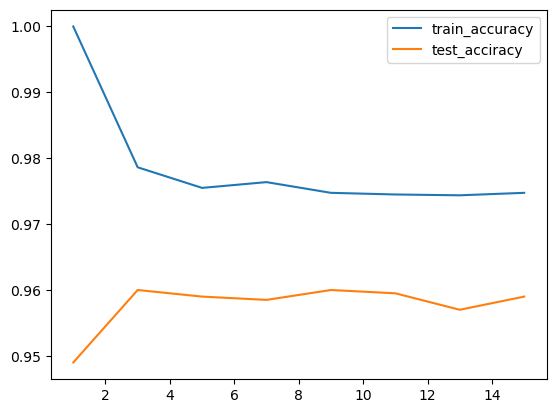

In [30]:
k_values = list(range(1,16,2))
plt.plot(k_values,train_accuracies)
plt.plot(k_values,test_accuracies)
plt.legend(["train_accuracy","test_acciracy"])

# Fitting with initial optimal value of k

In [31]:
knn_9 = KNeighborsClassifier(n_neighbors=9,metric = "euclidean")
knn_9.fit(X_train[["balance_normalized","income_normalized"]],y_train)
predictions = knn_9.predict(X_test[["balance_normalized","income_normalized"]])
test_accuracy = accuracy_score(y_test,predictions)
print("Accuracy on test data :",test_accuracy)
train_predictions = knn_9.predict(X_train[["balance_normalized","income_normalized"]])
train_accuracy = accuracy_score(y_train,train_predictions)
print("Accuracy on training data :",train_accuracy)

Accuracy on test data : 0.96
Accuracy on training data : 0.97475


# Validation Split

# 1. Simple train and validation Split

In [32]:
x_train, x_val, y_train_new, y_val = train_test_split(X_train[["balance_normalized","income_normalized"]],y_train,test_size = 0.2, random_state = 42)

In [33]:
print("Size of training data: ",x_train.shape[0])
print("Size of validation: ",x_val.shape[0])

Size of training data:  6400
Size of validation:  1600


In [34]:
train_accuracies =[]
val_accuracies=[]
for i in range(1,16,2):                 ## value of k is odd 
    knn = KNeighborsClassifier(n_neighbors=i,metric = "euclidean")
    knn.fit(x_train,y_train_new)
    val_predictions = knn.predict(x_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    val_accuracies.append(val_accuracy)
    train_predictions = knn.predict(x_train)
    train_accuracy = accuracy_score(y_train_new,train_predictions)
    train_accuracies.append(train_accuracy)

In [35]:
train_accuracies

[1.0,
 0.97859375,
 0.976875,
 0.976875,
 0.97625,
 0.97640625,
 0.97578125,
 0.9753125]

In [36]:
val_accuracies

[0.95625, 0.964375, 0.97, 0.97, 0.96875, 0.96875, 0.9675, 0.969375]

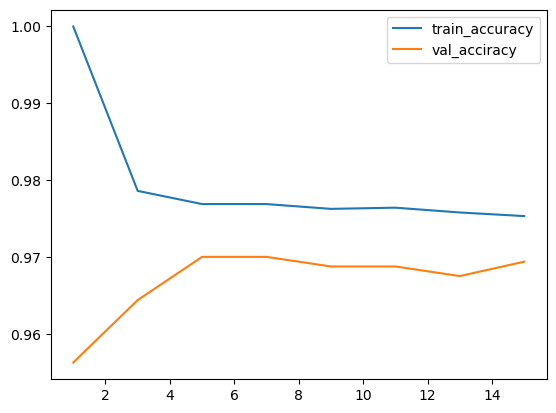

In [37]:
k_values = list(range(1,16,2))
plt.plot(k_values,train_accuracies)
plt.plot(k_values,val_accuracies)
plt.legend(["train_accuracy","val_acciracy"])

In [38]:
#fitting with optimal value of k
knn = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(x_train, y_train_new)
val_predictions = knn.predict(x_val)
val_accuracy = accuracy_score(y_val, val_predictions)
val_accuracy

0.97

In [39]:
predictions = knn.predict(X_test[["balance_normalized","income_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.96

# 2. Cross validation

In [40]:
from sklearn.model_selection import cross_validate

In [41]:
kmm = KNeighborsClassifier(n_neighbors = 5,metric = 'euclidean')

In [42]:
cv_results = cross_validate(knn,X_train[["balance_normalized","income_normalized"]],y_train,cv=5,return_train_score =True)
cv_results

{'fit_time': array([0.01251125, 0.01563096, 0.01562953, 0.01563025, 0.01563144]),
 'score_time': array([0.22847581, 0.22225571, 0.18801737, 0.17191935, 0.20338058]),
 'test_score': array([0.974375, 0.96625 , 0.97125 , 0.965625, 0.971875]),
 'train_score': array([0.9740625 , 0.97703125, 0.97640625, 0.97671875, 0.97546875])}

In [43]:
print("Training data average accuracy :",cv_results["train_score"].mean()*100)
print("Validation data average accuracy :",cv_results["test_score"].mean()*100)

Training data average accuracy : 97.59375
Validation data average accuracy : 96.98750000000001


# Hyper-parameter tuning using GridSearch

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
knn = KNeighborsClassifier(metric = "euclidean")

In [46]:
para = np.arange(1,16,2)

In [47]:
param_grid = {"n_neighbors":para}

In [48]:
knn_with_gs = GridSearchCV(knn,param_grid, return_train_score = True,verbose=1,scoring = "accuracy")

In [49]:
knn_with_gs.fit(X_train[["balance_normalized","income_normalized"]],y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15])},
             return_train_score=True, scoring='accuracy', verbose=1)

In [50]:
knn_with_gs.cv_results_

{'mean_fit_time': array([0.01587458, 0.01567965, 0.01874456, 0.01567931, 0.01246104,
        0.01563439, 0.01563001, 0.01541681]),
 'std_fit_time': array([3.81731462e-04, 1.65123716e-04, 6.35717492e-03, 9.14709153e-05,
        6.23094813e-03, 2.92235440e-06, 2.83708091e-06, 4.34031274e-04]),
 'mean_score_time': array([0.16899843, 0.17495518, 0.18126049, 0.17832308, 0.17502885,
        0.18130631, 0.17828436, 0.18454375]),
 'std_score_time': array([0.02021492, 0.00628915, 0.01253114, 0.0159691 , 0.00626208,
        0.01245254, 0.01244873, 0.01162692]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11, 13, 15],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11},
  {'n_neighbors': 13},
  {'n_neighbors': 15}],
 'split0_test_score': array([0.95875 , 0.970625, 0.974

In [51]:
knn_with_gs.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [52]:
tuned_df = pd.DataFrame(knn_with_gs.cv_results_)
tuned_df = tuned_df[["param_n_neighbors","mean_train_score","mean_test_score"]]
tuned_df

,param_n_neighbors,mean_train_score,mean_test_score
0,1,1.000000,0.955375
1,3,0.978437,0.966750
2,5,0.975938,0.969875
3,7,0.975969,0.970875
4,9,0.975125,0.973250
5,11,0.974781,0.973500
6,13,0.975000,0.973125
7,15,0.974719,0.972625


In [53]:
knn_11 = KNeighborsClassifier(n_neighbors=11,metric = "euclidean")
knn_11.fit(X_train[["balance_normalized","income_normalized"]],y_train)
predictions = knn_11.predict(X_test[["balance_normalized","income_normalized"]])
test_accuracy = accuracy_score(y_test,predictions)
print("Accuracy on test data :",test_accuracy)
train_predictions = knn_11.predict(X_train[["balance_normalized","income_normalized"]])
train_accuracy = accuracy_score(y_train,train_predictions)
print("Accuracy on training data :",train_accuracy)

Accuracy on test data : 0.9595
Accuracy on training data : 0.9745


# Evaluation measures

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
cm = confusion_matrix(y_test,predictions)
print("Confusion <atrix : \n",cm)

Confusion <atrix : 
 [[1890   41]
 [  40   29]]


In [56]:
pd.DataFrame(cm,columns = ["No","Yes"],index = ["No","Yes"])

,No,Yes
No,1890,41
Yes,40,29


# Precision and Recall

In [57]:
from sklearn.metrics import precision_score,recall_score

In [58]:
precision_score(y_test,predictions,pos_label = "Yes" )

0.4142857142857143

In [59]:
precision_score(y_test,predictions,pos_label = "No" )

0.9792746113989638

In [60]:
recall_score(y_test,predictions,pos_label = "Yes" )

0.42028985507246375

In [61]:
recall_score(y_test,predictions,pos_label = "No" )

0.9787674779906784

# F1-Score

In [62]:
from sklearn.metrics import f1_score

In [63]:
f1_score(y_test,predictions,pos_label = "No")

0.9790209790209791

In [64]:
f1_score(y_test,predictions,pos_label = "Yes")

0.4172661870503597

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.98      0.98      0.98      1931
         Yes       0.41      0.42      0.42        69

    accuracy                           0.96      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.96      0.96      0.96      2000

